In [1]:
import torch
from torch import nn


import matplotlib.pyplot as plt

# simple linear regression using pytorch

# data 

In [2]:
b = .3
w = .7

x = torch.arange(0 , 1 , 0.02)
y = x*w +b

# Train test split

In [3]:
train_index =int(len(x)*0.8)
x_train , x_test= x[:train_index] , x[train_index :]
y_train , y_test= y[:train_index] , y[train_index :]

In [4]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

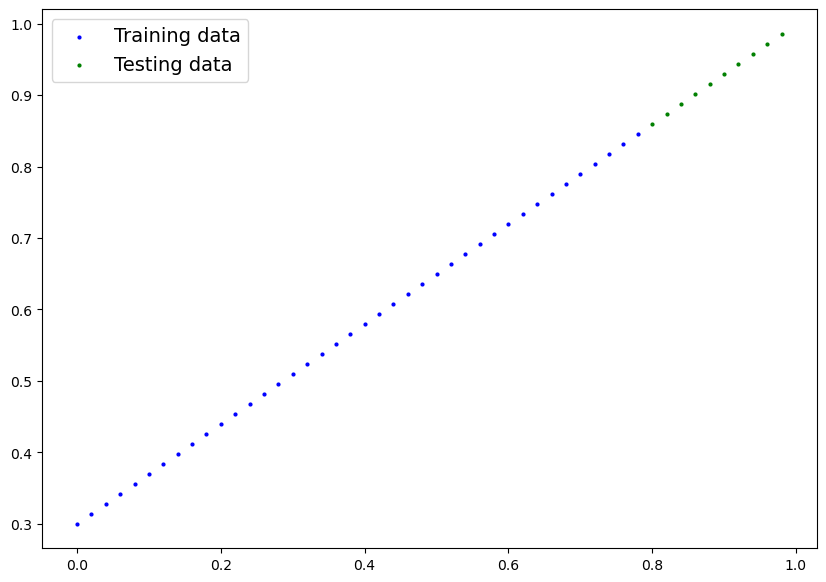

In [5]:
plot_predictions()

Define model

In [6]:
class Simple_Regression (nn.Module):

    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1)  ,requires_grad=True)
        self.b = nn.Parameter(torch.rand(1),requires_grad=True)

    def forward(self , x):

        return x*self.w +self.b

In [7]:
torch.manual_seed(42)
regression=Simple_Regression()
# define loss 
loss_fn = nn.MSELoss()
# define optimizer 
optimizer = torch.optim.SGD( params= regression.parameters()  , lr =0.01)

In [8]:
torch.manual_seed(42)
train_mae =[]
test_mae =[]
epoch =150
for i in range(epoch):

    # training 
    regression.train()
    # forward pass 
    y_pred_train=regression(x_train)
    # get train loss
    train_loss=loss_fn( y_pred_train,y_train)
    train_mae.append(train_loss.detach().numpy())
    # set gradient to zero -- are get accumulated from last step so reset it
    optimizer.zero_grad()
    # backward pass
    train_loss.backward()
    # update parameters
    optimizer.step()

    # setting model for evaluation 
    regression.eval()

    with torch.inference_mode():
        y_test_pred=regression(x_test)
        test_loss=loss_fn( y_test_pred,y_test)
        test_mae.append(test_loss.detach().numpy())

        if i % 10 ==0:
            print(f"train loss {train_loss}  test loss {test_loss}")



train loss 0.47248879075050354  test loss 0.5755255818367004
train loss 0.29560011625289917  test loss 0.3531690239906311
train loss 0.18495838344097137  test loss 0.21562115848064423
train loss 0.11575271934270859  test loss 0.13078677654266357
train loss 0.072464719414711  test loss 0.07866328954696655
train loss 0.04538766294717789  test loss 0.046795621514320374
train loss 0.02845033071935177  test loss 0.02743770182132721
train loss 0.01785522699356079  test loss 0.01577904261648655
train loss 0.011227094568312168  test loss 0.008837966248393059
train loss 0.007080242037773132  test loss 0.00477070827037096
train loss 0.004485416226089001  test loss 0.002440699841827154
train loss 0.002861354500055313  test loss 0.0011500805849209428
train loss 0.0018445199821144342  test loss 0.0004726141633000225
train loss 0.0012075090780854225  test loss 0.00014969459152780473
train loss 0.0008080926490947604  test loss 2.5862051188596524e-05


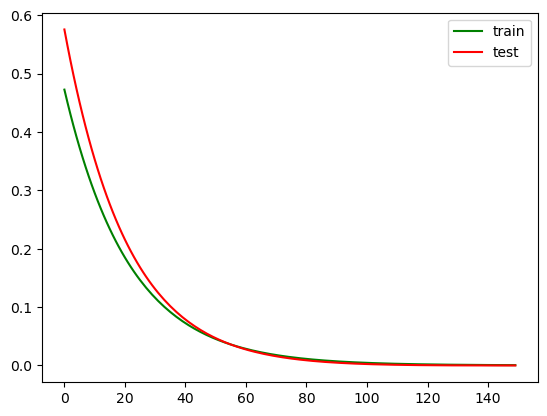

In [9]:
plt.plot(train_mae , c='g' ,label ='train')
plt.plot(test_mae , c='r'  ,label ='test')
plt.legend()
plt.show()

# test prediction

In [10]:
with torch.inference_mode():
    y_test_predcition=regression(x_test)

with torch.inference_mode():
    y_train_predcition=regression(x_train)

In [11]:
print(f" test loss : {loss_fn(y_test_predcition , y_test).detach()}" ),print(f" train loss : {loss_fn(y_train_predcition , y_train).detach()}")

 test loss : 7.45339275454171e-06
 train loss : 0.0005573015077970922


(None, None)

### trained and orignal parameter are very close to each other

In [12]:
regression._parameters,w, b

(OrderedDict([('w',
               Parameter containing:
               tensor([0.6555], requires_grad=True)),
              ('b',
               Parameter containing:
               tensor([0.3386], requires_grad=True))]),
 0.7,
 0.3)

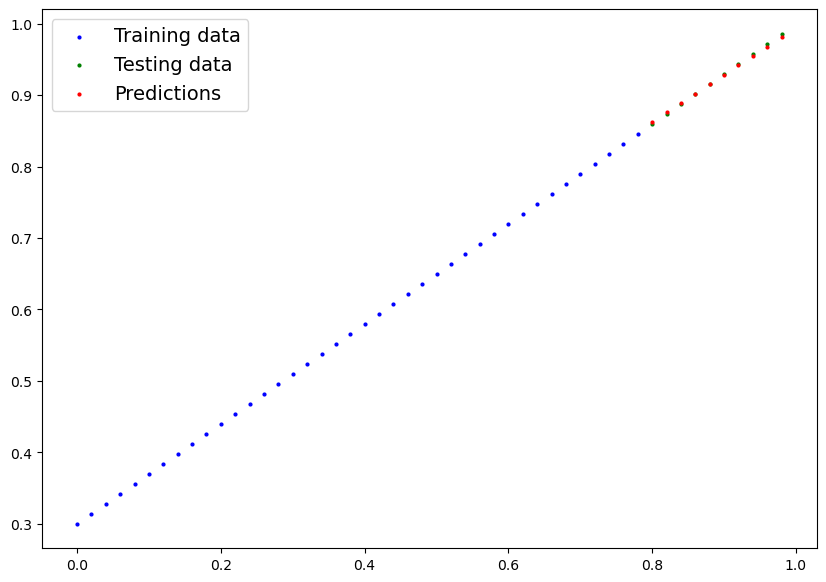

In [13]:
# plot prediction
plot_predictions(predictions=y_test_predcition)